In [1]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# T-tests compare means of continuous values between groups

In [2]:
df = data("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

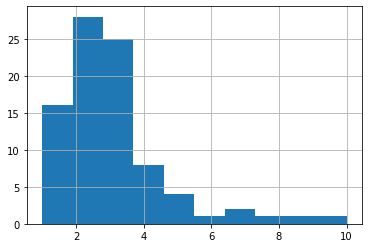

In [3]:
saturday = df[df.day == "Sat"]
saturday.tip.hist()

<AxesSubplot:>

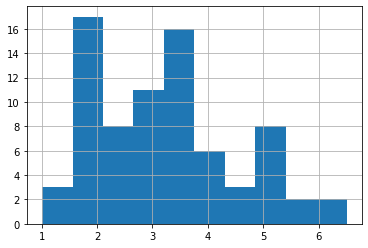

In [4]:
saturday = df[df.day == "Sun"]
saturday.tip.hist()

## Types of T-Tests

### Samples 
- One Sample t-test compares the mean of a subgroup to the mean of a population 
- One sample example is Sunday tips vs. the rest of the week tips

- The two sample t-test compares the means of two subgroups 
- A two-sample t-test would be comparing average tips between smokers vs. nonsmokers

### Two Tails Checks for Any Difference between the means
- A two-tailed t-test is measuring for any difference, regardless of direction (means of one group higher or lower)
- The two-tailed t-test is checking if the means of two groups are different
- If we have a two-tailed t-test, we can use the p value, as is and compare it to the alpha.
- means are different (either one is higher or lower, but two tailed means we're not focused on direction)

### One Tailed checks if one mean is greater than or less than the other
- To test if the means are higher, we evaluate `(p/2) < a and t > 0` (to test if higher)
- For checking if less-than, we do `(p/2) < a and  t < 0`



## So do you use one tailed or two tailed?
- It depends on how you're forming your alternative hypothesis
- If your alternative hypothesis states "there is a difference between these groups" - two tailed
- If your alternative hypothesis stats "X group has higher/lower tips than Y" - one tailed

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Do smokers have a larger total_bill than non-smokers
# Null hypothesis is that the total_bills are the same for both groups
# We're comparing two subgroups, so we will be doing a 2 sample t-test
# Since we're looking if one group is higher total_bill.mean than the other, one-tailed

In [7]:
null_hypothesis = "The means of total_bill are the same for smoker vs. nonsmoker"
alternative_hypothesis = "Smokers have a higher total_bill than non smokers"
confidence_level = .95
a = 1 - confidence_level # call your shot before you run your test

In [8]:
# Let's compare the two populations visually
smokers = df[df.smoker == "Yes"]
non = df[df.smoker == "No"]

<AxesSubplot:>

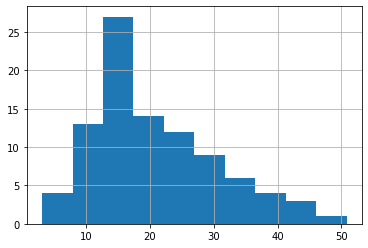

In [9]:
smokers.total_bill.hist()

<AxesSubplot:>

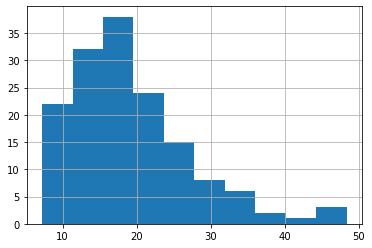

In [10]:
non.total_bill.hist()

In [11]:
# Two sample b/c we're comparing two-subgroups to eachother
# Single tail, b/c we're checking if smokers total_bill is higher
# .ttest_ind test of independence == 2 sample t-test function

#
t, p = stats.ttest_ind(smokers.total_bill, non.total_bill)
t, p

(1.3384363834700073, 0.1820103288430244)

In [12]:
# p/2 along with t > 0 is how we compare means if higher
if (p/2) < a and t > 0:
    print("Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In English this means, we don't have sufficient evidence to support the claim that smokers have higher bills than non-smokers

In [13]:
# Let's take this same setup from above, and check if the means are different, regardless of direction
null_hypothesis = "The mean total_bill of nonsmokers and smokers is the same"
alternative_hypothesis = "The means total bill of nonsmokers and smokers is different"

# Still two-sample (b/c there are 2 subgroups, and two-tailed, b/c we're looking for any difference

In [14]:
t, p = stats.ttest_ind(smokers.total_bill, non.total_bill)
t, p

(1.3384363834700073, 0.1820103288430244)

In [15]:
# We can use only p < a if we have a two-tailed test (b/c we're looking for mean(a) != mean(b))
if p < a:
    print("We reject the null hypothesis that they are the same")
    print("We move forward w/ the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [16]:
print("In English, this means we don't have sufficient evidence to support the claim that smokers and nonsmokers have different bills")

In English, this means we don't have sufficient evidence to support the claim that smokers and nonsmokers have different bills


## The host notices us working on statistics in the booth all the time
and they ask us:
- given this data, are tips different on weekends vs. weekdays?
- We'll have to make a weekend group and a weekday group (todo)
- We're comparing two sub-groups, we have a 2-sample t-test
- If we're not concerned about direction, but only IF the means are different, then we'll go w/ 2-tailed

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
def weekend(x):
    if x == "Sun" or x == "Sat":
        return 1
    else:
        return 0

In [19]:
df["is_weekend"] = df.day.apply(weekend)
df.tail()

,total_bill,tip,sex,smoker,day,time,size,is_weekend
240,29.03,5.92,Male,No,Sat,Dinner,3,1
241,27.18,2.00,Female,Yes,Sat,Dinner,2,1
242,22.67,2.00,Male,Yes,Sat,Dinner,2,1
243,17.82,1.75,Male,No,Sat,Dinner,2,1
244,18.78,3.00,Female,No,Thur,Dinner,2,0


In [20]:
weekends = df[df.is_weekend == 1]
weekdays = df[df.is_weekend == 0]

<AxesSubplot:>

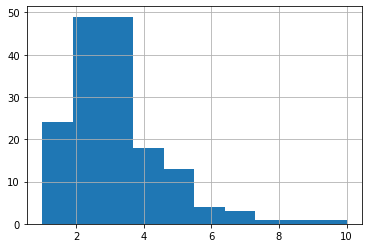

In [21]:
weekends.tip.hist()

<AxesSubplot:>

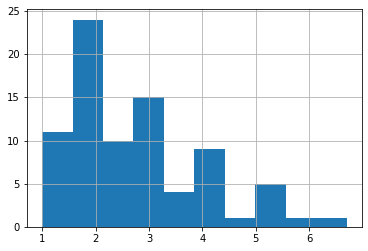

In [22]:
weekdays.tip.hist()

In [23]:
confidence_level = .90
a = 1 - confidence_level

In [24]:
# ttest_ind for two-sample t-tests
t, p = stats.ttest_ind(weekdays.tip, weekends.tip)
t, p

(-1.8834950801996837, 0.06083244523772748)

In [25]:
if p < a:
    print("We reject the null hypothesis that weekend and weekday tips are the same")
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support the claim that the tip levels are different")

We reject the null hypothesis that weekend and weekday tips are the same


## So... we don't have evidence to support the claim that the means are significantly different

In [26]:
# Let's check if the weekday tips are higher than weekend tips!
# This means we're going from a two-tailed (direction ambivilent) to a one-tailed test

In [27]:
confidence_level = .95
a = 1 - confidence_level

## PAY CLOSE ATTENTION
# The direction of a one-tailed test here, and the t < 0 or t > 0 part
# comes down to the first arg into .ttest_ind
t, p = stats.ttest_ind(weekdays.tip, weekends.tip)
t, p

(-1.8834950801996837, 0.06083244523772748)

In [28]:
null = "There is no difference"
alternative_hypothesis = "weekday tips are greater than Weekend tips" # Paying attention to the order of args

In [29]:
# Let's check the one_tailed test
# t > 0 if we're testing if one mean is higher than the other
if (p/2) < a and t > 0:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    print("we don't have enough evidence to support the claim that", alternative_hypothesis)

We fail to reject the null hypothesis
we don't have enough evidence to support the claim that weekday tips are greater than Weekend tips


In [30]:
# Let's make a new hypothesis
# Weekeends tips are greater than weekday tips
null = "There is no difference"
alternative_hypothesis = "weekday tips are less than than weekend tips" # Paying attention to the order of args

# Let's check the one_tailed test
# t < 0 if we're testing if one mean is higher than the other
if (p/2) < a and t < 0:
    print("We reject the null hypothesis that tip means are the same")
    print("We move foward with the understanding that weekday tips are lower than weekend tips")
else:
    print("We fail to reject the null hypothesis")
    print("There is insufficient evidence to support the claim")

We reject the null hypothesis that tip means are the same
We move foward with the understanding that weekday tips are lower than weekend tips


In [31]:
weekdays.tip.mean(), weekends.tip.mean()

(2.7628395061728392, 3.115276073619632)